# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's know as **multi-class classification**
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classfication.

To practice multi-class classification, we're going to build a neural network to classfiy images of different items of clothing.

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [3]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [5]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

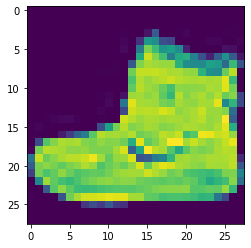

In [6]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

2

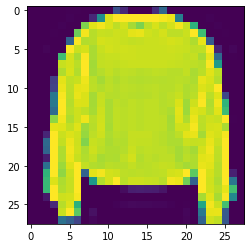

In [7]:
# Check out another sample img and label
plt.imshow(train_data[7]);

train_labels[7]

In [8]:
# Create a small list so we can index onto our training labelas so they are human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

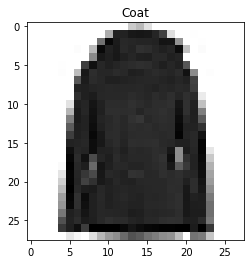

In [9]:
# Plot an example images and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

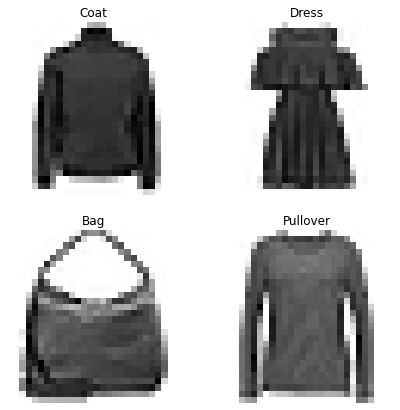

In [10]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False);

## Building a multi-class classification model

For our multi-class classificaton model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Out layer activation = Softmax (not Sigmoid)

In [11]:
# our data need to be flattened (from 28 * 28) to None, 784
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])

flatten_model.output_shape

(None, 784)

In [12]:
28 * 28

784

In [13]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
non_norm_histroy = model.fit(
    train_data, 
    tf.one_hot(train_labels, depth=10), 
    epochs=10, 
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3210 - accuracy: 0.1390 - val_loss: 2.1505 - val_accuracy: 0.1693
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0755 - accuracy: 0.1846 - val_loss: 1.9425 - val_accuracy: 0.2504
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6353 - accuracy: 0.3365 - val_loss: 1.5335 - val_accuracy: 0.3529
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4693 - accuracy: 0.3809 - val_loss: 1.4013 - val_accuracy: 0.4283
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3728 - accuracy: 0.4210 - val_loss: 1.3353 - val_accuracy: 0.4394
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3290 - accuracy: 0.4351 - val_loss: 1.3042 - val_accuracy: 0.4510
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2933 - accuracy: 0.4462 - val_loss: 1.2618 - val_accuracy:

In [15]:
# Check the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Chec the mean and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the number in the numbers in the tensors they try to find patterns between 0 & 1.

In [17]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Chec the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [18]:
# Now our data is normalized, let's build a model to find patterns in it

# set the random seed
tf.random.set_seed(42)

# 1. create a model same as above
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
norm_histroy = model_2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0224 - accuracy: 0.6027 - val_loss: 0.7135 - val_accuracy: 0.7432
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6522 - accuracy: 0.7573 - val_loss: 0.6468 - val_accuracy: 0.7572
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6024 - accuracy: 0.7778 - val_loss: 0.6084 - val_accuracy: 0.7872
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5626 - accuracy: 0.8019 - val_loss: 0.5779 - val_accuracy: 0.7987
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5419 - accuracy: 0.8097 - val_loss: 0.5703 - val_accuracy: 0.8017
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5315 - accuracy: 0.8150 - val_loss: 0.5686 - val_accuracy: 0.7998
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5232 - accuracy: 0.8169 - val_loss: 0.5552 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized numbers (between 0 & 1)

<AxesSubplot:title={'center':'Normalized data'}>

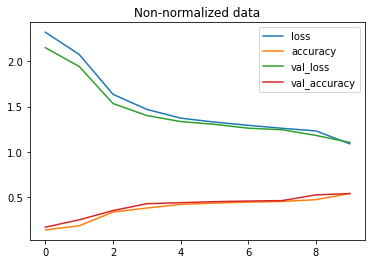

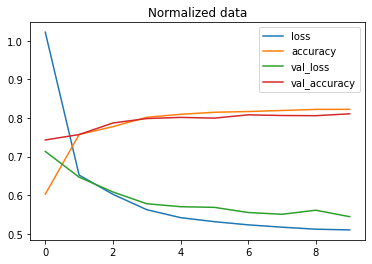

In [19]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_histroy.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_histroy.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data bit different architecture).

## Finding the ideal learning rate

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch/20)
)

# 3. fit the model
find_lr_history = model_3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2172 - accuracy: 0.5214 - val_loss: 0.9207 - val_accuracy: 0.6540 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7960 - accuracy: 0.7176 - val_loss: 0.7620 - val_accuracy: 0.7354 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7202 - accuracy: 0.7437 - val_loss: 0.7124 - val_accuracy: 0.7499 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6824 - accuracy: 0.7536 - val_loss: 0.6905 - val_accuracy: 0.7561 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6596 - accuracy: 0.7598 - val_loss: 0.6676 - val_accuracy: 0.7622 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6443 - accuracy: 0.7654 - val_loss: 0.6682 - val_accuracy: 0.7651 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

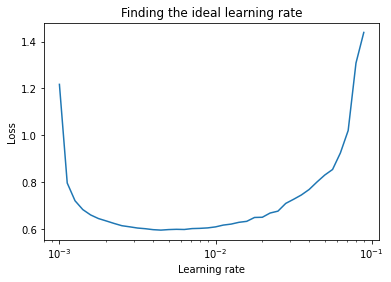

In [21]:
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [22]:
# let's refit a model with the ideal learning rate

# set random seed
tf.random.set_seed(42)

# create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# comple the model
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# fit the model
history_4 = model_4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1268 - accuracy: 0.6136 - val_loss: 0.7242 - val_accuracy: 0.7771
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6384 - accuracy: 0.7959 - val_loss: 0.6269 - val_accuracy: 0.7917
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5671 - accuracy: 0.8103 - val_loss: 0.5889 - val_accuracy: 0.7973
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5370 - accuracy: 0.8178 - val_loss: 0.5520 - val_accuracy: 0.8125
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5198 - accuracy: 0.8221 - val_loss: 0.5555 - val_accuracy: 0.8089
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5064 - accuracy: 0.8258 - val_loss: 0.5482 - val_accuracy: 0.8110
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4990 - accuracy: 0.8286 - val_loss: 0.5475 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in application

Lets go thru the top 2...

In [23]:
# Let's create confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(
    y_true, y_pred, classes=None, figsize=(10,10), text_size=15
):
  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(
      title="Confusion Matrix", 
      xlabel="Predicted Label", 
      ylabel="True Label", 
      xticks=np.arange(n_classes), 
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the threshold
  threshold = (cm.max() + cm.min()) / 2.

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [24]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [27]:
# Make some predictions with our model
y_probs = model_4.predict(test_data_norm) # probs is short for "prediction probabilities"

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.6699122e-08, 8.8210494e-15, 2.9029210e-11, 5.9730465e-09,
        6.0850341e-10, 4.8266706e-01, 3.5512617e-08, 1.0091137e-01,
        2.6448135e-04, 4.1615704e-01],
       [3.5551504e-05, 1.9066806e-09, 9.2835677e-01, 1.7000502e-07,
        3.5888121e-02, 1.0052762e-22, 3.5718966e-02, 0.0000000e+00,
        3.5565847e-07, 0.0000000e+00],
       [1.8024680e-03, 9.8476899e-01, 3.4072762e-03, 4.3064263e-03,
        9.1878005e-04, 3.5740468e-03, 6.1643339e-04, 1.6656572e-04,
        1.1574545e-04, 3.2318104e-04],
       [1.8024680e-03, 9.8476899e-01, 3.4072762e-03, 4.3064263e-03,
        9.1878005e-04, 3.5740468e-03, 6.1643339e-04, 1.6656572e-04,
        1.1574545e-04, 3.2318104e-04],
       [1.3590996e-01, 6.5669803e-05, 2.7546391e-01, 7.9522487e-03,
        3.5178274e-02, 3.9583430e-09, 5.4091972e-01, 8.5276371e-16,
        4.5101773e-03, 9.3104890e-24]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [28]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.6699122e-08, 8.8210494e-15, 2.9029210e-11, 5.9730465e-09,
        6.0850341e-10, 4.8266706e-01, 3.5512617e-08, 1.0091137e-01,
        2.6448135e-04, 4.1615704e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [29]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [30]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[740,   8,  22,  64,   5,   3, 147,   0,  11,   0],
       [  1, 961,   9,  23,   5,   0,   0,   0,   1,   0],
       [ 19,   7, 715,   9, 172,   1,  74,   0,   3,   0],
       [ 37,  28,  14, 813,  48,   2,  53,   2,   3,   0],
       [  0,   3,  99,  21, 804,   0,  68,   0,   5,   0],
       [  1,   0,   0,   2,   0, 925,   0,  32,  14,  26],
       [121,   9, 127,  49, 151,   2, 533,   0,   8,   0],
       [  0,   0,   0,   0,   0,  61,   0, 901,   0,  38],
       [  6,   1,   4,   7,   4,   8,  48,   7, 915,   0],
       [  0,   0,   0,   0,   0,  46,   0,  41,   1, 912]])

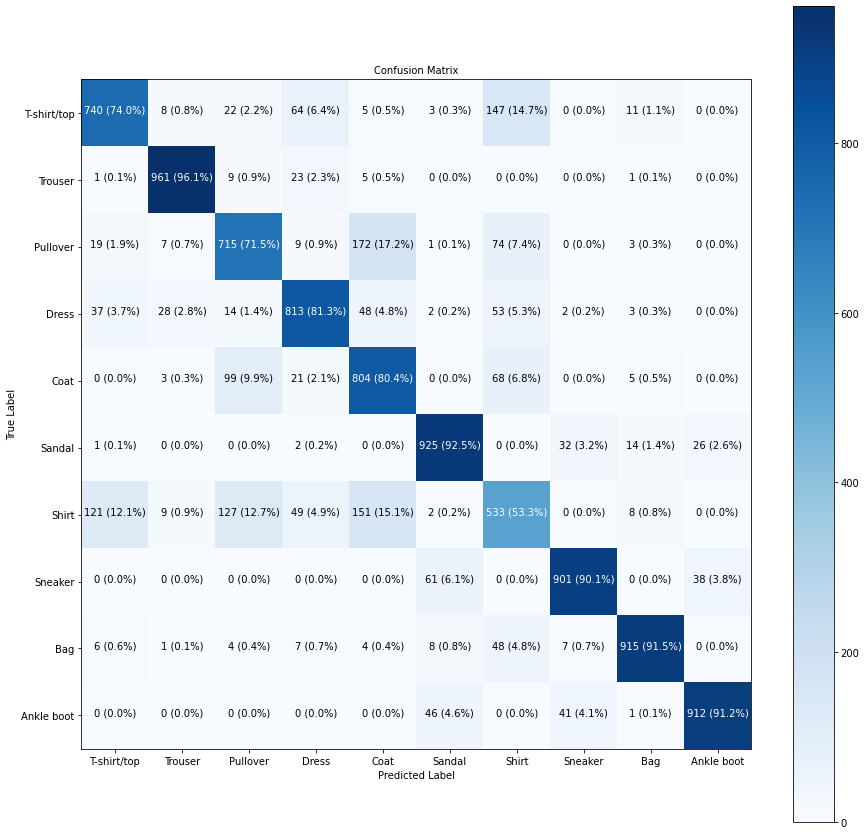

In [32]:
# Make a prettier confusion matrix
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(15,15),
    text_size=10
)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [35]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth 
  labels.
  """

  # set up random integer
  i = random.randint(0, len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color= "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
      pred_label, 100*tf.reduce_max(pred_probs), true_label
  ),
      color=color
  ) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 18ms/step


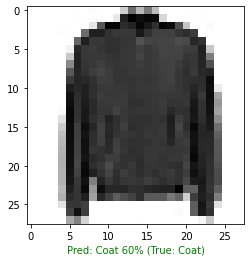

In [52]:
# Check out a random image as well as its prediction
plot_random_image(
    model=model_4,
    images=test_data_norm, # always make predictions on the same kind of data your model was trained on
    true_labels=test_labels,
    classes=class_names
)

## What patterns is our model learning

In [53]:
# Find the layers of our most recent model
model_4.layers

In [55]:
# Extract a particular layer
model_4.layers[1]

In [56]:
# Get the patterns of a layers in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.5651009 ,  0.04927321, -0.8006367 ,  0.6122914 ],
        [-0.57923144, -0.57548934, -0.4494155 ,  0.53427994],
        [-1.091152  ,  0.16615258,  0.2748691 ,  0.0452157 ],
        ...,
        [-0.16172056,  0.12654468,  0.3139329 , -1.5224991 ],
        [ 0.03970008, -0.4733874 , -0.6887459 , -0.8609179 ],
        [-0.33435196, -0.35940135, -0.11257514, -0.5663596 ]],
       dtype=float32), (784, 4))

In [57]:
28 * 28

784

In [58]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's checkout the bias vector

In [59]:
# Bias and biases shapes
biases, biases.shape

(array([1.7157588, 0.6719591, 2.0554624, 1.0563875], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

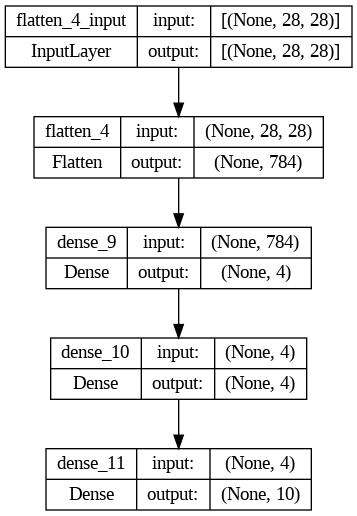

In [60]:
# Let's check out another way of viewing our deep learning models
# See the inputs and outputs of each layer
tf.keras.utils.plot_model(model_4, show_shapes=True)

In [ ]:
# Next che